In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
candidate_items = pd.read_csv('../Data/dressipi_recsys2022/candidate_items.csv')
item_features = pd.read_csv('../Data/dressipi_recsys2022/item_features.csv')


train_purchases = pd.read_csv('../Data/dressipi_recsys2022/train_purchases.csv')
train_sessions = pd.read_csv('../Data/dressipi_recsys2022/train_sessions.csv')

# Sesiones

In [3]:
train_sessions

,session_id,item_id,date
0,3,9655,2020-12-18 21:25:00.373
1,3,9655,2020-12-18 21:19:48.093
2,13,15654,2020-03-13 19:35:27.136
3,18,18316,2020-08-26 19:18:30.833
4,18,2507,2020-08-26 19:16:31.211
...,...,...,...
4743815,4440001,20409,2020-10-30 23:37:20.658
4743816,4440001,14155,2020-10-30 23:31:56.607
4743817,4440001,14303,2020-10-30 23:36:17.934
4743818,4440001,27852,2020-10-30 23:39:55.186


In [4]:
print('Cantidad de sesiones unicas:')
print(len(train_sessions.session_id.unique()))

Cantidad de sesiones unicas:
1000000


In [5]:
print('Cantidad de items unicos:')
print(len(train_sessions.item_id.unique()))

Cantidad de items unicos:
23496


## Cantidad de vistas por sesion

In [6]:
cantidad_de_vistas_sesion = train_sessions\
    .groupby(['session_id'], as_index=False)['item_id'].count()\
    .sort_values(by='session_id', ascending=True)\
    .rename(columns={'item_id': 'vistas_sesion'})\
    .reset_index(drop=True)

In [7]:
cantidad_de_vistas_sesion

,session_id,vistas_sesion
0,3,2
1,13,1
2,18,3
3,19,17
4,24,9
...,...,...
999995,4439986,6
999996,4439990,11
999997,4439994,1
999998,4439999,7


In [8]:
cantidad_de_vistas_sesion.vistas_sesion.describe()

count    1000000.000000
mean           4.743820
std            6.084665
min            1.000000
25%            1.000000
50%            3.000000
75%            6.000000
max          100.000000
Name: vistas_sesion, dtype: float64

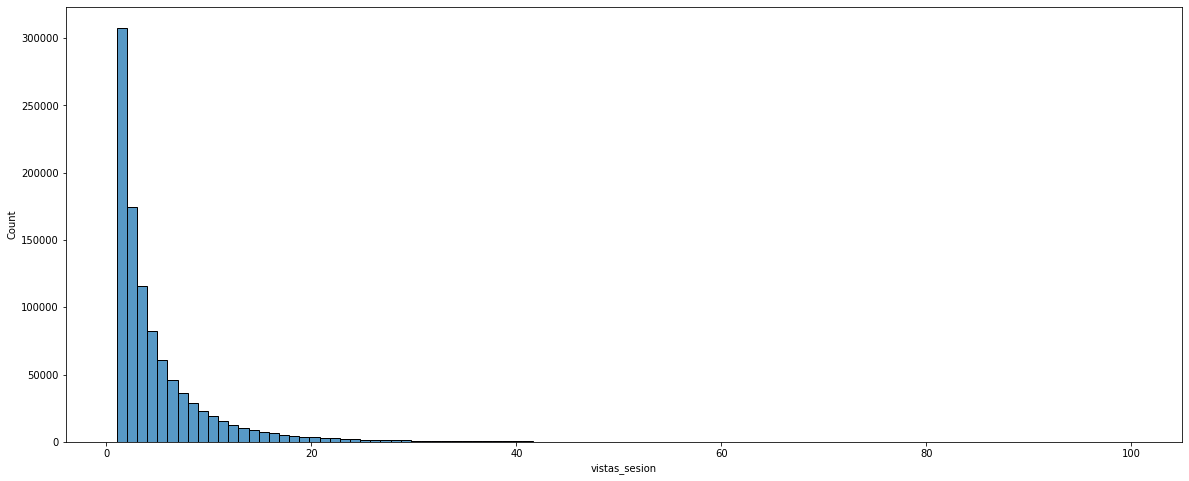

In [9]:
plt.figure(figsize=(20,8))
Plot = sns.histplot(cantidad_de_vistas_sesion["vistas_sesion"], bins = 100)

# Compras

In [10]:
train_purchases

,session_id,item_id,date
0,3,15085,2020-12-18 21:26:47.986
1,13,18626,2020-03-13 19:36:15.507
2,18,24911,2020-08-26 19:20:32.049
3,19,12534,2020-11-02 17:16:45.92
4,24,13226,2020-02-26 18:27:44.114
...,...,...,...
999995,4439986,2915,2021-05-13 11:56:37.464
999996,4439990,8786,2020-08-22 14:28:22.382
999997,4439994,21630,2020-11-27 20:10:28.961
999998,4439999,16962,2020-11-27 11:01:41.356


In [11]:
print('Cantidad de sesiones unicas:')
print(len(train_purchases.session_id.unique()))

Cantidad de sesiones unicas:
1000000


In [12]:
print('Cantidad de items unicos:')
print(len(train_purchases.item_id.unique()))

Cantidad de items unicos:
18907


# Caracteristicas de los items

In [13]:
item_features

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75
...,...,...,...
471746,28143,68,351
471747,28143,55,390
471748,28143,11,109
471749,28143,73,91


In [14]:
print('Cantidad de items unicos:')
print(len(item_features.item_id.unique()))

Cantidad de items unicos:
23691


In [15]:
print('Cantidad de codigos de categoria de caracteristicas unicos:')
print(len(item_features.feature_category_id.unique()))

Cantidad de codigos de categoria de caracteristicas unicos:
73


In [16]:
print('Cantidad de codigos de valor de la categoria de caracteristicas unicos:')
print(len(item_features.feature_value_id.unique()))

Cantidad de codigos de valor de la categoria de caracteristicas unicos:
890


In [17]:
cantidad_de_caracteristicas_por_item = item_features\
    .groupby(['item_id'], as_index=False)['feature_category_id'].count()\
    .sort_values(by='item_id', ascending=True)\
    .rename(columns={'feature_category_id': 'cantidad_de_caracteristicas'})\
    .reset_index(drop=True)

In [18]:
cantidad_de_caracteristicas_por_item

,item_id,cantidad_de_caracteristicas
0,2,13
1,3,24
2,4,24
3,7,15
4,8,24
...,...,...
23686,28139,24
23687,28140,18
23688,28141,24
23689,28142,16


In [19]:
cantidad_de_caracteristicas_por_item.cantidad_de_caracteristicas.describe()

count    23691.000000
mean        19.912667
std          5.130942
min          2.000000
25%         17.000000
50%         20.000000
75%         24.000000
max         33.000000
Name: cantidad_de_caracteristicas, dtype: float64

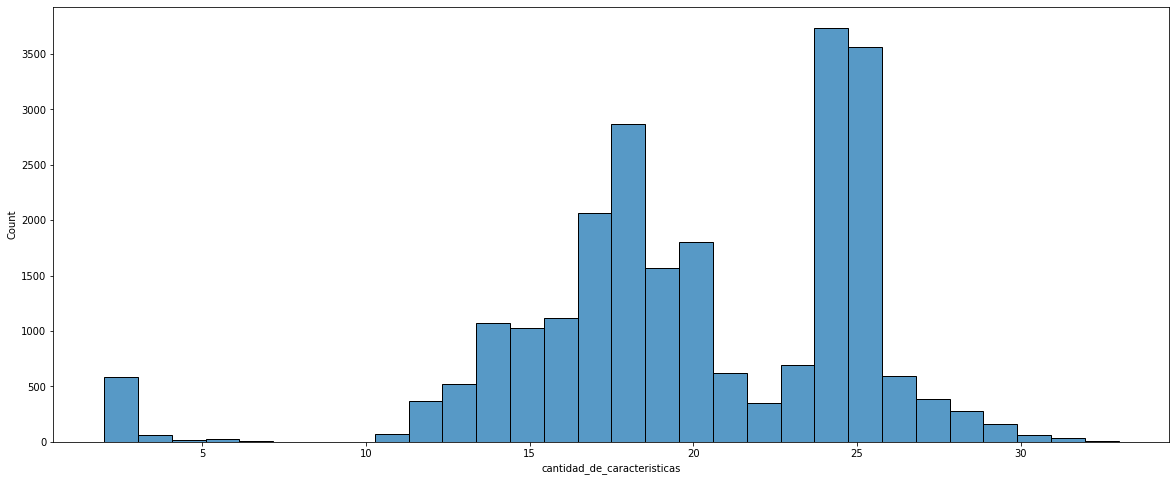

In [20]:
plt.figure(figsize=(20,8))
Plot = sns.histplot(cantidad_de_caracteristicas_por_item["cantidad_de_caracteristicas"], bins = 30)

In [92]:
items_ids_list = []
caracteristicas_repetidas_list = []

for item_id in tqdm(list(item_features.item_id.unique())):
    
    lista_de_caracteriticas_del_item = list(item_features.loc[item_features.item_id == item_id].feature_category_id)
    caracteristicas_repetidas = list(set([x for x in lista_de_caracteriticas_del_item if lista_de_caracteriticas_del_item.count(x) > 1]))
    
    
    if len(caracteristicas_repetidas)>0:
        
        items_ids_list.append(item_id)
        caracteristicas_repetidas_list.append(caracteristicas_repetidas)

100%|██████████| 23691/23691 [00:07<00:00, 3270.17it/s]


In [95]:
items_con_caracteristicas_repetidas = pd.DataFrame(
    {'item_id': items_ids_list,
     'feature_category_id_repetida': caracteristicas_repetidas_list
    })

items_con_caracteristicas_repetidas

,item_id,feature_category_id_repetida
0,10,[30]
1,11,[30]
2,18,[30]
3,30,[4]
4,35,[30]
...,...,...
4913,28123,[30]
4914,28125,[30]
4915,28126,[30]
4916,28133,"[28, 30]"


In [102]:
items_con_caracteristicas_repetidas['feature_category_id_repetida'].astype(str).value_counts()

[30]        4366
[4]          272
[28]         121
[28, 30]      75
[4, 30]       61
[53]          16
[46]           4
[1]            2
[4, 28]        1
Name: feature_category_id_repetida, dtype: int64

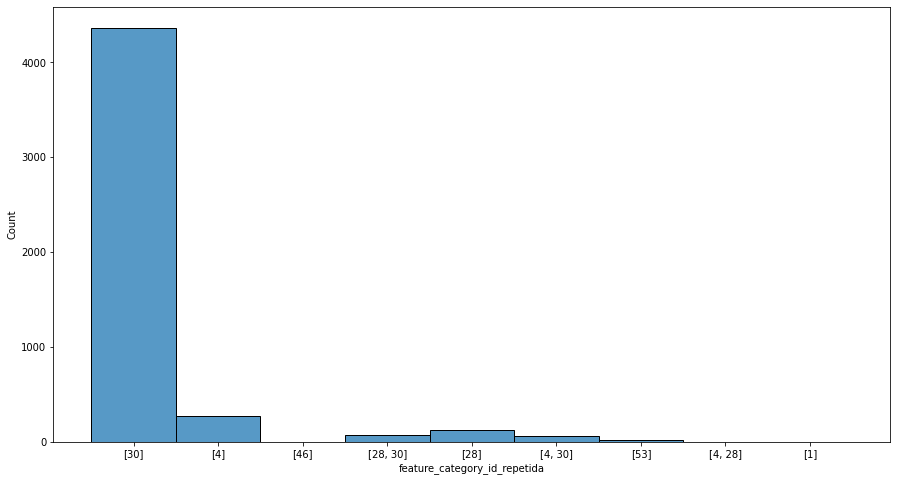

In [101]:
plt.figure(figsize=(15,8))
Plot = sns.histplot(items_con_caracteristicas_repetidas['feature_category_id_repetida'].astype(str), bins=2, discrete=True)

In [65]:
len(item_features.loc[item_features.feature_category_id == 5].feature_value_id.unique())

11

In [66]:
cantidad_de_valores_por_categorias_de_caracteristicas = pd.pivot_table(data=item_features, index='feature_category_id', aggfunc=pd.Series.nunique)\
    .reset_index(level=0)\
    .drop('item_id', 1)\
    .sort_values(by='feature_category_id', ascending=True)\
    .rename(columns={'feature_value_id': 'cantidad_de_valores_por_categoria_de_caracteristica'})

<ipython-input-66-bd0401e8e9bb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  cantidad_de_valores_por_categorias_de_caracteristicas = pd.pivot_table(data=item_features, index='feature_category_id', aggfunc=pd.Series.nunique)\


In [67]:
cantidad_de_valores_por_categorias_de_caracteristicas

,feature_category_id,cantidad_de_valores_por_categoria_de_caracteristica
0,1,6
1,2,25
2,3,5
3,4,16
4,5,11
...,...,...
68,69,29
69,70,7
70,71,11
71,72,25


In [68]:
cantidad_de_valores_por_categorias_de_caracteristicas.cantidad_de_valores_por_categoria_de_caracteristica.describe()

count    73.000000
mean     12.383562
std      13.610280
min       1.000000
25%       4.000000
50%       7.000000
75%      16.000000
max      67.000000
Name: cantidad_de_valores_por_categoria_de_caracteristica, dtype: float64

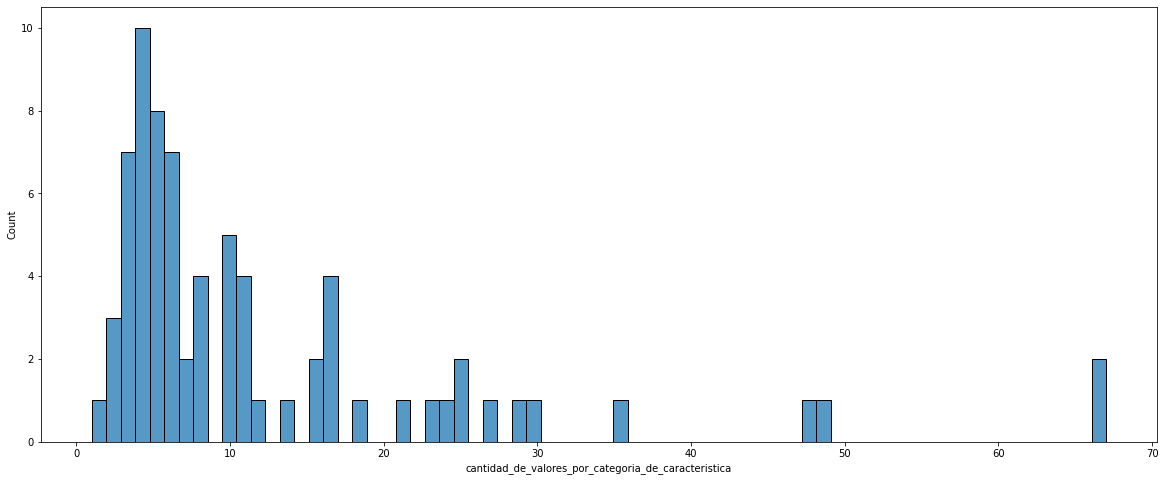

In [75]:
plt.figure(figsize=(20,8))
Plot = sns.histplot(cantidad_de_valores_por_categorias_de_caracteristicas["cantidad_de_valores_por_categoria_de_caracteristica"], bins = 70)

In [77]:
cantidad_de_valores_por_categorias_de_caracteristicas.cantidad_de_valores_por_categoria_de_caracteristica.sum()

904

In [78]:
73+904

977

# Items candidatos

In [21]:
candidate_items

,item_id
0,4
1,8
2,9
3,19
4,20
...,...
4985,28128
4986,28131
4987,28132
4988,28133


In [22]:
len(candidate_items.item_id.unique())

4990

In [83]:
all(item in list(item_features.item_id.unique()) for item in list(candidate_items.item_id))

True